# Prevedere la qualità del latte
- Siroli Alex
- Laurea in Ingegneria e Scienze Informatiche
- Programmazione di Data Intensive

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

## Descrizione del problema
L'obiettivo del progetto è quello di predire, tramite una variabile discreta binaria, se il latte è di alta o bassa qualità.
Il dataset consiste in 7 variabili indipendenti: pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
Generalmente la qualità del latte dipende da questi fattori.

In [2]:
dataset = pd.read_csv('./milk.csv')
dataset.tail()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Quality
680,8.1,66,1,0,1,1,255,0
681,6.7,38,1,0,1,0,255,1
682,3.0,40,1,1,1,1,255,0
683,6.8,43,1,0,1,0,250,1
684,8.6,55,0,1,1,1,255,0


Il dataset utilizzato è scaricabile al seguente link: https://www.kaggle.com/datasets/cpluzshrijayan/milkquality?resource=download

In [3]:
bad = dataset[dataset['Quality'] == 0]
good = dataset[dataset['Quality'] == 1]

print('Total: ', dataset['Quality'].count(), 'elements')
print('Bad: ', bad['Quality'].count(), 'elements')
print('Good: ', good['Quality'].count(), 'elements')

Total:  685 elements
Bad:  429 elements
Good:  256 elements


Il dataset si compone di 685 elementi: 256 di alta qualità, 429 di bassa qualità.

<AxesSubplot:ylabel='Quality'>

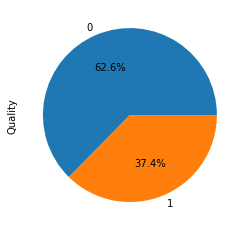

In [4]:
dataset['Quality'].value_counts().plot.pie(autopct="%1.1f%%")

# Parte 1

## SIgnificato delle feature

In [5]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Quality
0,6.6,35,1,0,1,0,254,1
1,6.6,36,0,1,0,1,253,1
2,8.5,70,1,1,1,1,246,0
3,9.5,34,1,1,0,1,255,0
4,6.6,37,1,1,1,1,255,1


-  **pH**: ph del latte (da 3 a 9,5)
-  **Temprature**: temperatura del latte (da 34 a 90 gradi Celsius)
-  **Taste**: indica se il sapore è ottimale (0 = non ottimale, 1 = ottimale)
-  **Odor**: indica se l'odore è ottimale (0 = non ottimale, 1 = ottimale)
-  **Fat**: indica se ha una quantità ottimale di grassi (0 = non ottimale, 1 = ottimale)
-  **Turbidity**: indica il livello di torbidità (0 = basso, 1 = alto)
-  **Colour**: indica il colore del latte (da 245 a 255)
-  **Quality**: indica se il latte è di qualità (0 = bassa qualità, 1 = alta qualità)

La variabile target è **Quality** , binaria, che assume valore 0 se il latte è di bassa qualità, 1 se è di alta qualità.

Si utilizza il metodo *describe* per ottenere informazioni sulle features (media, deviazione standard, distribuzione in termini di masssimi, minimi e percentili).

In [6]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Quality
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,6.627445,46.686131,0.618978,0.579562,0.827737,0.690511,252.661314,0.373723
std,1.738086,11.552544,0.485993,0.493990,0.377885,0.462621,3.418522,0.484145
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,245.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,1.000000,0.000000,250.000000,0.000000
50%,6.700000,43.000000,1.000000,1.000000,1.000000,1.000000,255.000000,0.000000
75%,7.400000,50.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,1.000000


## Le feature nel dettaglio

Si visualizzano le distribuzioni delle variabili continue del dataset.

Text(0.5, 0, 'Colour')

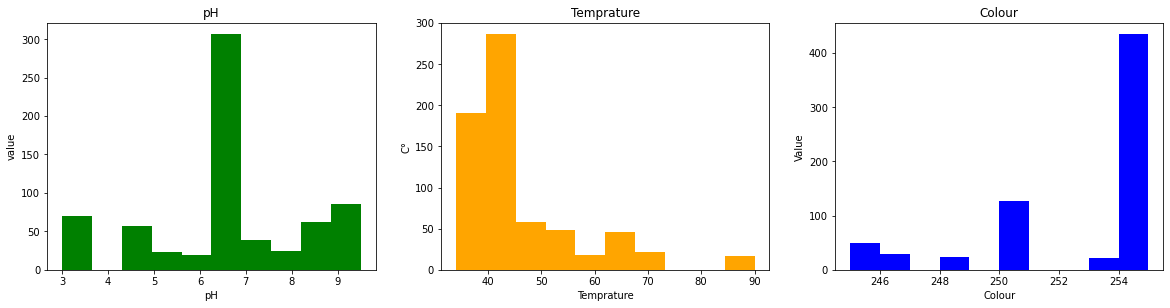

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title("pH")
plt.hist(dataset["pH"], color="green")
plt.ylabel("value")
plt.xlabel("pH")

plt.subplot(2,3,2)
plt.title("Temprature")
plt.hist(dataset["Temprature"], color="orange")
plt.ylabel("C°")
plt.xlabel("Temprature")

plt.subplot(2,3,3)
plt.title("Colour")
plt.hist(dataset["Colour"], color="blue")
plt.ylabel("Value")
plt.xlabel("Colour")

Notiamo che il pH principalmente è tra 6 e 7, la temperatura minore di 50 e il colore maggiore di 253.
Si rappresentano ora i dati con potblox.

Text(0, 0.5, 'Value')

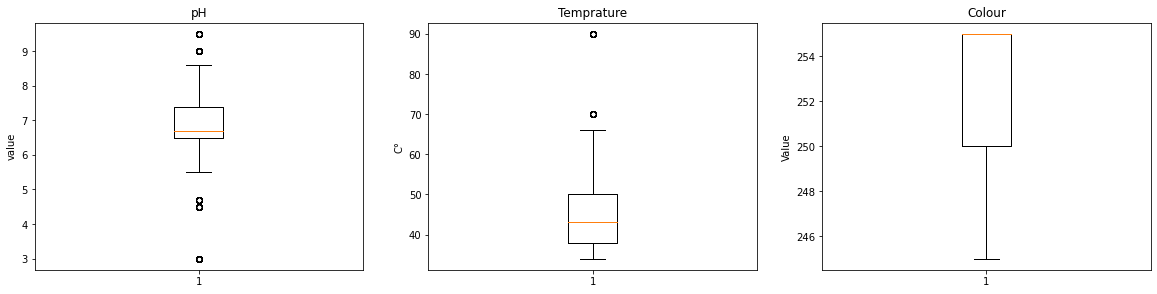

In [8]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
plt.title("pH")
plt.boxplot(dataset["pH"])
plt.ylabel("value")

plt.subplot(2,3,2)
plt.title("Temprature")
plt.boxplot(dataset["Temprature"])
plt.ylabel("C°")

plt.subplot(2,3,3)
plt.title("Colour")
plt.boxplot(dataset["Colour"])
plt.ylabel("Value")

Si visualizzano le distribuzioni delle variabili di categoria del dataset.

<AxesSubplot:ylabel='Taste'>

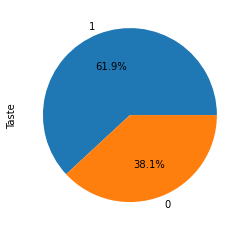

In [9]:
dataset['Taste'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Odor'>

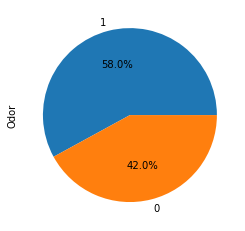

In [10]:
dataset['Odor'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Fat'>

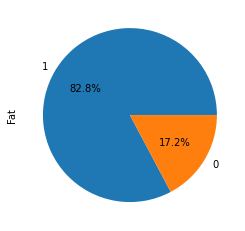

In [11]:
dataset['Fat'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:ylabel='Turbidity'>

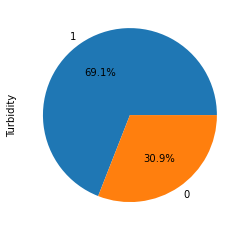

In [12]:
dataset['Turbidity'].value_counts().plot.pie(autopct="%1.1f%%")

## Esplorazione relazioni tra features

Vediamo in che modo, al variare di queste features, vari anche la qualità del latte.

Analizziamo il pH del latte.

<AxesSubplot:ylabel='Frequency'>

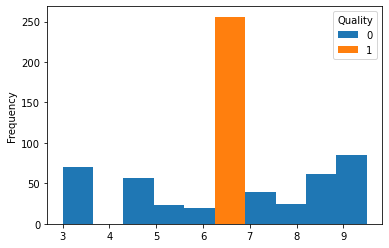

In [13]:
dataset.pivot(columns="Quality")["pH"].plot.hist()

Notiamo chiaramente che il pH del latte è un fattore molto rilevante, infatti tutto il latte di qualità ha un pH tra 6 e 7.

Analizziamo la temperatura del latte.

<AxesSubplot:ylabel='Frequency'>

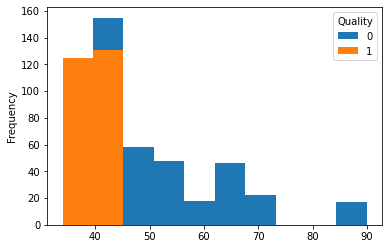

In [14]:
dataset.pivot(columns="Quality")["Temprature"].plot.hist()

Notiamo che anche la temperatura del latte è un fattore rilevante, infatti tutto il latte di qualità ha una temperatura minore di 45 C°. 

Proviamo a vedere graficamente se utilizzando queste due feature sia possibile distinguere la qualità del latte.

In [15]:
milk_color_map ={0:"blue", 1:"red"}
milk_colors= dataset["Quality"].map(milk_color_map)

<AxesSubplot:xlabel='pH', ylabel='Temprature'>

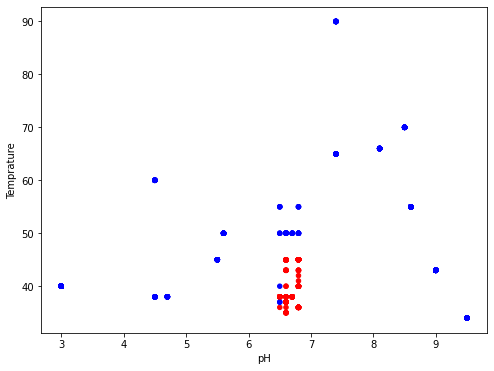

In [16]:
dataset.plot.scatter("pH", "Temprature", c=milk_colors, figsize=(8,6))

Come immaginavamo utilizzando queste due feature il latte di qualità è visibile in una porzione limitata del grafico.

Analizziamo il colore del latte.

<AxesSubplot:ylabel='Frequency'>

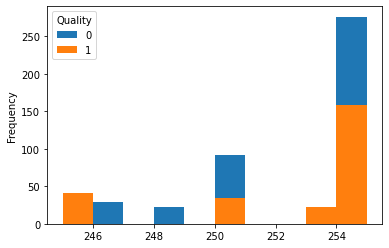

In [17]:
dataset.pivot(columns="Quality")["Colour"].plot.hist()

Notiamo invece che il colore del latte non ha molta rilevanza per la previsione della sua qualità.

Analizziamo il sapore del latte.

<AxesSubplot:ylabel='Frequency'>

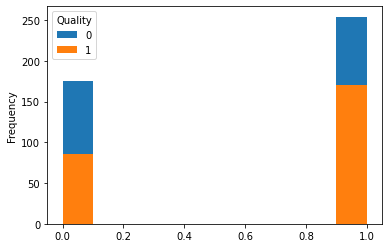

In [18]:
dataset.pivot(columns="Quality")["Taste"].plot.hist()

Analizziamo l'odore del latte.

<AxesSubplot:ylabel='Frequency'>

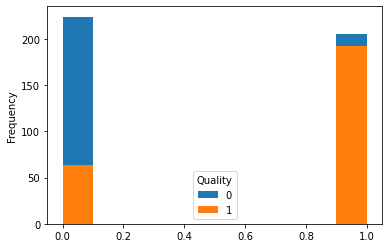

In [19]:
dataset.pivot(columns="Quality")["Odor"].plot.hist()

Notiamo che quasi la totalità del latte di bassa qualità non ha un buon odore.

Analizziamo la quantità di grassi nel latte.

<AxesSubplot:ylabel='Frequency'>

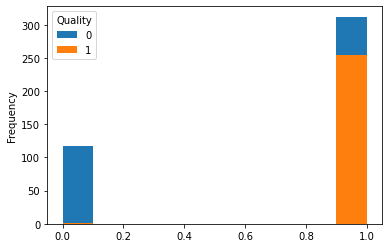

In [20]:
dataset.pivot(columns="Quality")["Fat"].plot.hist()

Notiamo che la quasi totalità del latte di alta qualità ha la quantità ottimale di grassi.

Analizziamo la turbidità del latte.

<AxesSubplot:ylabel='Frequency'>

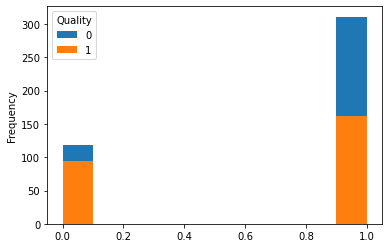

In [21]:
dataset.pivot(columns="Quality")["Turbidity"].plot.hist()

# PARTE 2

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import precision_score, recall_score, f1_score

Per osservare le variabili più rilevanti, dopo la divisione dei dati in input in training e validation set, si applica una regolarizzazione L1.
Si sceglie, come modello, il Perceptron.

## Preparazione dei dati

Il set x rappresenta tutte le feature, in set y solo la feature *Quality*.

In [23]:
y = dataset["Quality"]
x = dataset.drop(["Quality"], axis=1)

In [24]:
X_pre_train, X_pre_val, y_pre_train, y_pre_val = train_test_split(
    x,
    y,
    test_size=1/3, random_state=42
)

Definiamo i metodi per fare il training del modello e calcolare lo score.

In [25]:
def get_coefficients(model, index, model_name="model"):
    return pd.Series(model.named_steps[model_name].coef_[0], index=index)
    
def fit(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    f1_measure = f1_score( y_val,  model.predict(X_val), average="macro")
    print("F1_measure: ", f1_measure)

Si usano i dati divisi precedentemente, usando l'algoritmo Perceptron, per allineare un modello di classificazione.
Come iperparametro *alpha* si è scelto quello che restituisce l'f1_measure maggiore.

In [26]:
model_coeffs = []
i = 0

for alpha in np.logspace(-4, 0, 5):
    print("alpha {} :\n".format(alpha))
    model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42, penalty="l1",alpha=alpha))
    ])
    fit(model, X_pre_train, y_pre_train, X_pre_val, y_pre_val)
    model_coeffs.append(get_coefficients(model, X_pre_train.columns))
    i += 1
    print("\n")

alpha 0.0001 :

F1_measure:  0.6205018939393939


alpha 0.001 :

F1_measure:  0.871440463054378


alpha 0.01 :

F1_measure:  0.5333855799373041


alpha 0.1 :

F1_measure:  0.3708791208791209


alpha 1.0 :

F1_measure:  0.3708791208791209




Abbiamo F1_measure maggiore per Alpha uguale a 0.001

In [27]:
std_pen_model = Pipeline([("scaler", StandardScaler()), ("model",  Perceptron(random_state=42,penalty="l1",alpha=0.001))
    ])
fit(std_pen_model, X_pre_train, y_pre_train, X_pre_val, y_pre_val)

F1_measure:  0.871440463054378


In [28]:
std_pen_model_coeff = get_coefficients(std_pen_model, X_pre_train.columns, 'model')
std_pen_model_coeff

pH            1.845129
Temprature   -4.608989
Taste        -1.451305
Odor          2.571416
Fat           4.117059
Turbidity    -3.501053
Colour        0.000000
dtype: float64

L'analisi rivela che le feature più rilevanti sono: Temprature, Fat e Turbidity; mentre la feature Colour è irrilevante.

Successivamente viene mostrata una heat map che, utilizzando la **Correlazione di Pearson**, visualizza tutte le correlazioni tra features.

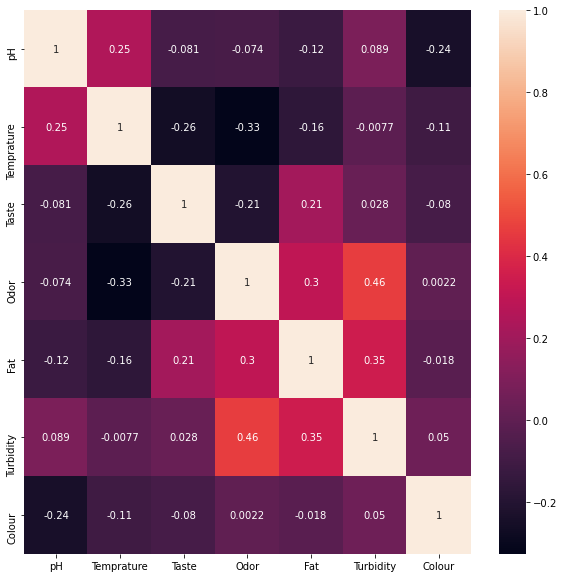

In [29]:
pearson_correlation = X_pre_train.corr(method='pearson')

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sb.heatmap(pearson_correlation, annot=True)

plt.show()

L'unica leggera correlazione visibile è tra Turbidità e Odore.

Nel grafico a dispersione sottostante vengono rappresentate, nelle tre dimensioni, le feature più rilevanti: *Temprature*, *Fat* e *Turbidity*.

Osserviamo come, effettivamente, il latte di alta qualità (in rosso) e quello di bassa (in blu) si distribuiscono in maniera ben disinta: il latte di qualità generalmente ha una temperatura minore di 45 gradi, ottimi livelli di grassi e bassa turbidità.

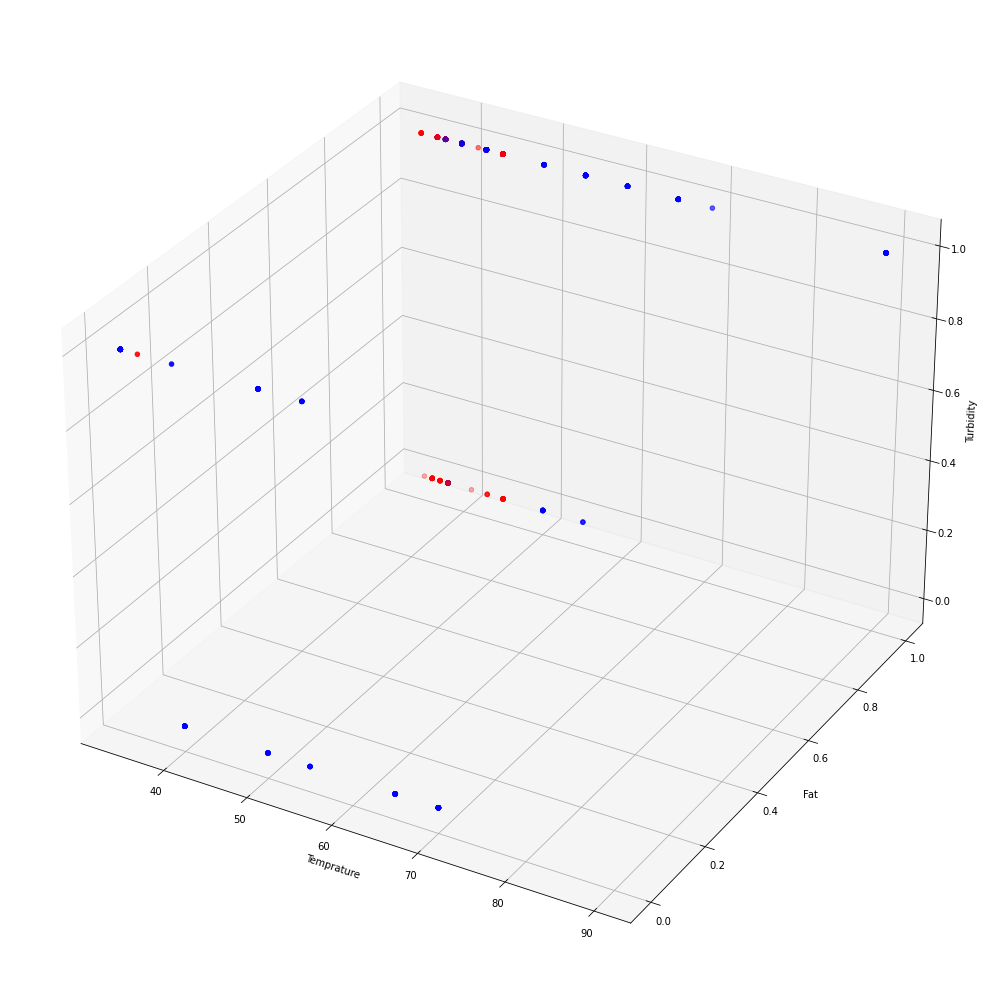

In [30]:
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(projection='3d')
x = "Temprature"
y = "Fat"
z = "Turbidity"
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
tmp = dataset
milk_colors= tmp["Quality"].map(milk_color_map)

ax.scatter(tmp[x], tmp[y], tmp[z], c=milk_colors)

# Parte 3

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

La seguente funzione confronta il modello con i diversi iperparametri e ritorna il modello che ha restituito la f1_measure migliore. 

In [32]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
models = {}

def print_k_cross_validation_scores(model, X, y, kf):
    scores = cross_val_score(model, X, y, cv=kf)
    print("            Scores: {}\n              Mean: {}\nStandard deviation: {}".format(scores, scores.mean(), scores.std()))

def grid_search_with_cross_validation(model, grid, kf, dataset, class_attribute, scoring=None):
    grid_search = GridSearchCV(model, grid, scoring=scoring, cv=kf, n_jobs=-1)

    X_train, X_val, y_train, y_val = train_test_split(
        dataset.drop([class_attribute], axis=1),
        dataset[class_attribute],
        test_size=1/3, random_state=42
    )

    grid_search.fit(X_train, y_train)
    
    score = grid_search.score(X_val, y_val)

    print("Best cross validation score: {}\n".format(grid_search.best_score_))
    print("             Test set score: {}\n".format(score))
    print("                Best params: {}\n".format(grid_search.best_params_))
    print("             Best estimator: {}\n".format(grid_search.best_estimator_))
    return grid_search.best_estimator_, score
    #print(pd.DataFrame(grid_search.cv_results_))


Le seguenti funzioni verrranno usate per graficare i modelli, per ogni combinazione di features.

In [33]:
def separator_2d(model, x1, nameModel, m, n):
    # ricaviamo w e b dal modello
    w = model.named_steps[nameModel].coef_[0]
    b = model.named_steps[nameModel].intercept_
    return -x1 * w[m] / w[n] - b / w[n]

In [34]:
def separator_3d(model, x1,y1, nameModel, i,j,t):
    # ricaviamo w e b dal modello
    w = model.named_steps[nameModel].coef_[0]
    b = model.named_steps[nameModel].intercept_
    return ((-x1 * w[i]) / w[t]) -((y1* w[j])/w[t]) - (b / w[t])

In [35]:
def draw_line(model, nameModel, i, j, color):
    xlim, ylim = plt.xlim(), plt.ylim()
    sep_x = np.linspace(*xlim, 2)
    sep_y = separator_2d(model, sep_x, nameModel, i , j)
    plt.plot(sep_x, sep_y, c=color, linewidth=2, label=nameModel)
    plt.xlim(xlim); plt.ylim(ylim)


def plot_separator_on_data(X, y, dataset,avoidList, model=None, nameModel=None,
                           repeatCombination = True, newFig = True,
                           lineColor = "green"):
    X = np.array(X)
    n, m = X.shape
    colors = pd.Series(y).map(milk_color_map)
    if(newFig):
      plt.figure(figsize=(50, 50))
    k = 0
    for i in range(m): 
      g = 0 if repeatCombination else i+1
      for j in range(g,m):
        if(j!=i and i not in(avoidList) and j not in (avoidList)):
          k+=1
          plt.subplot(m, m, k)
          plt.scatter(X[:, i], X[:, j], c=colors)
          plt.xlabel(dataset.columns[i])
          plt.ylabel(dataset.columns[j])
          if model is not None:
            draw_line(model,nameModel, i, j, lineColor)
             

Di seguito viene definita una funzione che calcola tutti i dati utili per valutare un modello.
- Accuratezza: percentuale di classificazioni corrette (in caso di sbilanciamento tra classi, non molto utile)
- Precision: indica la percentuale di esempi classificati in una classe che sono realmente tali
- Recall: indica la percentuale di esempi realmente di una classe che sono stati classificati come tali
- F1-measure: media armonica tra precision e recall: misura unica della performance di un modello 

In [36]:
def measureModel(x_val, y_val, y_pred, model):
  accuracy = model.score(x_val, y_val)
  precision_good = precision_score(y_val, y_pred, pos_label=1)
  precision_bad = precision_score(y_val, y_pred, pos_label=0)
  recall_good = recall_score(y_val, y_pred, pos_label=1)
  recall_bad = recall_score(y_val, y_pred, pos_label=0)
  f1_measure = f1_score(y_val, y_pred, average="macro")
  print("Accuracy: {}\n".format(accuracy))
  print("Precision good: {}\n".format(precision_good))
  print("Precision bad: {}\n".format(precision_bad))
  print("Recall good: {}\n".format(recall_good))
  print("Recall bad: {}\n".format(recall_bad))
  print("f1_measure: {}\n".format(f1_measure))

## Perceptron

Si utilizza il seguente metodo per ottenere la migliore combinazione di iperparametri sul metodo Perceptron, utilizzando il K-fold-cross-validation.

In [37]:
%%time

per_model = Pipeline([
    ("scaler", StandardScaler()),
    ("per", Perceptron(n_jobs=-1, random_state=42))
])

#print(per_model.get_params())

per_grid = {
    "scaler": [None, StandardScaler()],
    "per__penalty": ["l2", "l1", "elasticnet"],
    "per__alpha": np.logspace(-3, 3, 7),
    "per__fit_intercept": [False, True]
}

per_model, score = grid_search_with_cross_validation(per_model, per_grid, k_fold, dataset, "Quality", scoring = "f1_macro")
models["Perceptron"] = {"Model": per_model, "Score": score}

Best cross validation score: 0.7327422909136974

             Test set score: 0.7571484681853888

                Best params: {'per__alpha': 0.001, 'per__fit_intercept': True, 'per__penalty': 'l2', 'scaler': StandardScaler()}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, n_jobs=-1, penalty='l2',
                            random_state=42))])

Wall time: 5.23 s


In [38]:
model = Pipeline(steps=[('scaler', StandardScaler()),
                ('per',
                 Perceptron(alpha=0.001, n_jobs=-1, penalty='elasticnet',
                            random_state=42))])
model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  model.predict(X_pre_val), average="macro")

models["Perceptron"] = {"Model": model, "Score": f1_measure}

In [39]:
y_pred = model.predict(X_pre_val)
measureModel(X_pre_val, y_pre_val, y_pred, model)

Accuracy: 0.7641921397379913

Precision good: 0.7083333333333334

Precision bad: 0.8045112781954887

Recall good: 0.723404255319149

Recall bad: 0.7925925925925926

f1_measure: 0.7571484681853888



In [40]:
print(model.named_steps["per"].coef_)
print(model.named_steps["per"].intercept_)

[[ 2.48754436 -6.96902684 -1.22566581  0.95591342  5.53853842 -3.74087489
  -1.1219113 ]]
[-4.]


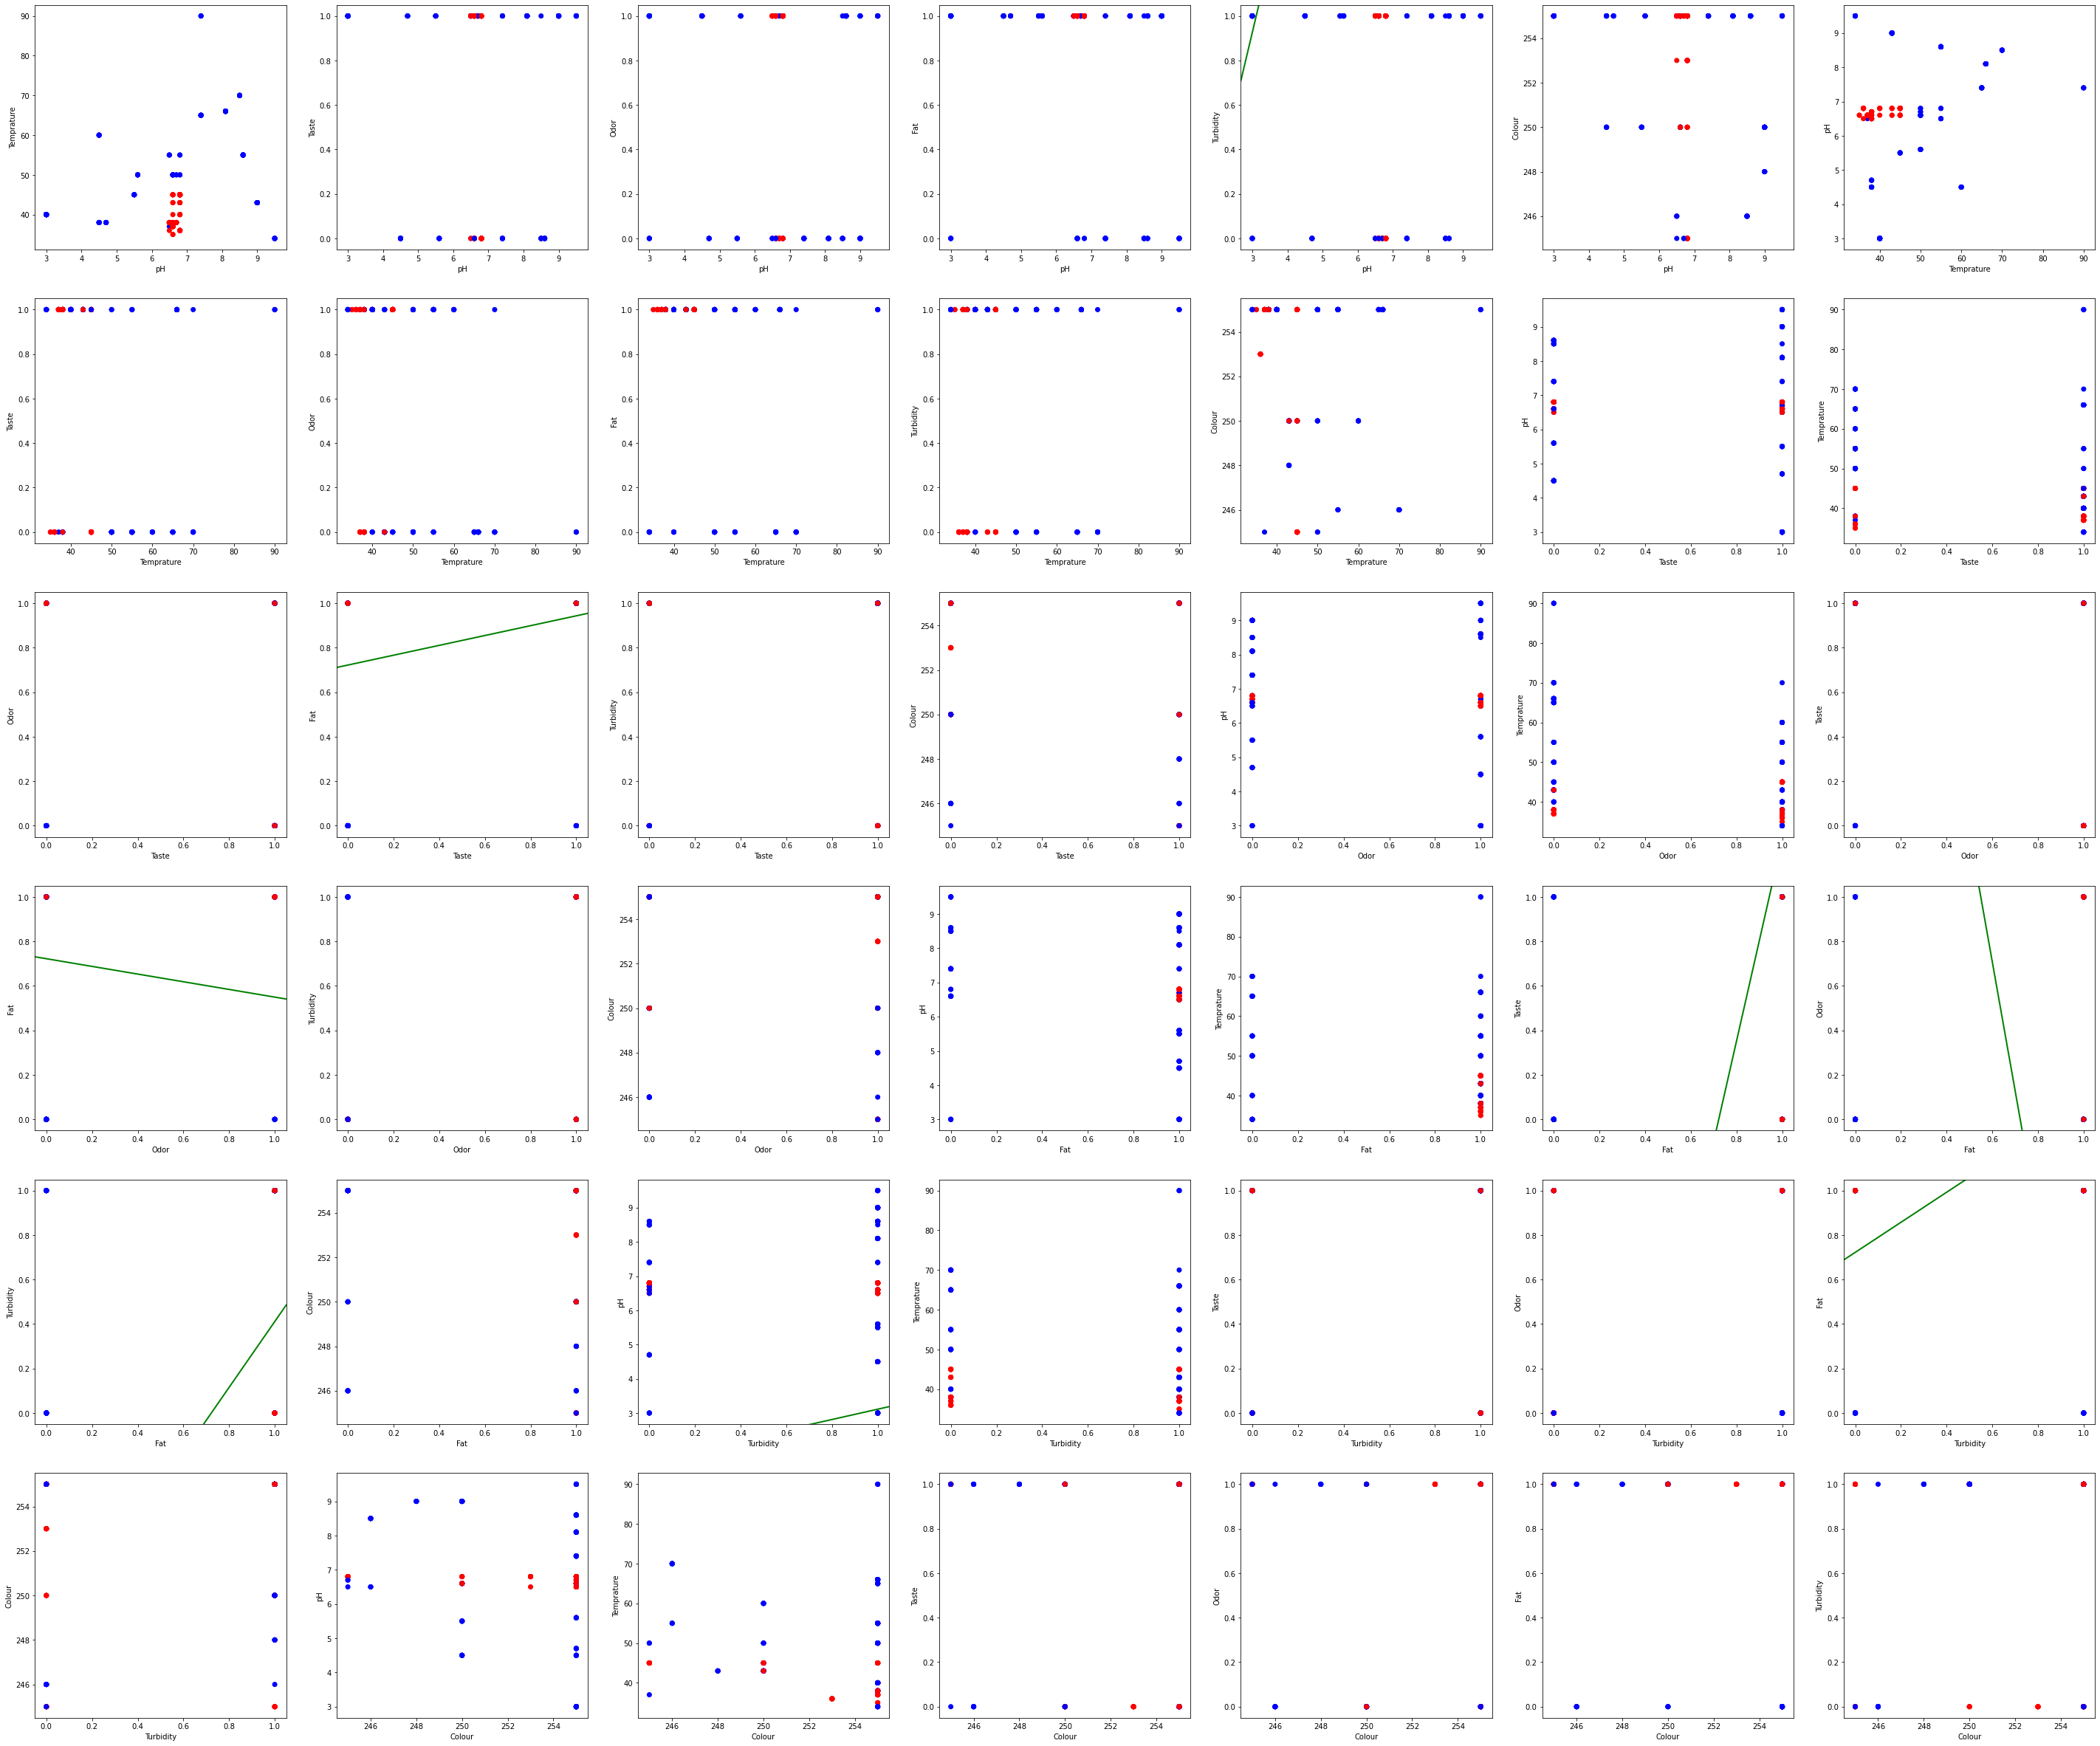

In [41]:
plot_separator_on_data(X_pre_val, y_pre_val, dataset,[],model, "per")

## Regressione Logistica

Si passa ora a studiare la regressione logistica. I procedimenti sono gli stessi visti per il Perceptron.

In [42]:
%%time

log_model = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(solver='liblinear', random_state=42))
])

#print(log_model.get_params())

log_grid = {
    "scaler": [None, StandardScaler()],
    "lr__penalty": ["l2", "l1"],
    "lr__C": np.logspace(-4, 2, 7),
    "lr__fit_intercept": [False, True]
}

log_model, score = grid_search_with_cross_validation(log_model, log_grid, k_fold, dataset,"Quality", scoring = "f1_macro")
models["Logistic Regression"] = {"Model" : log_model, "Score": score}

Best cross validation score: 0.8544892937874534

             Test set score: 0.891725768321513

                Best params: {'lr__C': 10.0, 'lr__fit_intercept': False, 'lr__penalty': 'l1', 'scaler': None}

             Best estimator: Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(C=10.0, fit_intercept=False, penalty='l1',
                                    random_state=42, solver='liblinear'))])

Wall time: 974 ms


In [43]:
log_model = Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

log_model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  log_model.predict(X_pre_val), average="macro")

models["Logistic Regression"] = {"Model" : log_model, "Score": f1_measure}

In [44]:
measureModel(X_pre_val, y_pre_val, log_model.predict(X_pre_val), log_model)

Accuracy: 0.8951965065502183

Precision good: 0.8723404255319149

Precision bad: 0.9111111111111111

Recall good: 0.8723404255319149

Recall bad: 0.9111111111111111

f1_measure: 0.891725768321513



La f1_measure rivela un netto miglioramento della Logistic Regression rispetto al Perceptron.

In [45]:
log_model.named_steps["lr"].coef_

array([[ 0.55467826, -0.26689781, -0.6876117 ,  2.04535892,  6.06709469,
        -1.66771258,  0.0077269 ]])

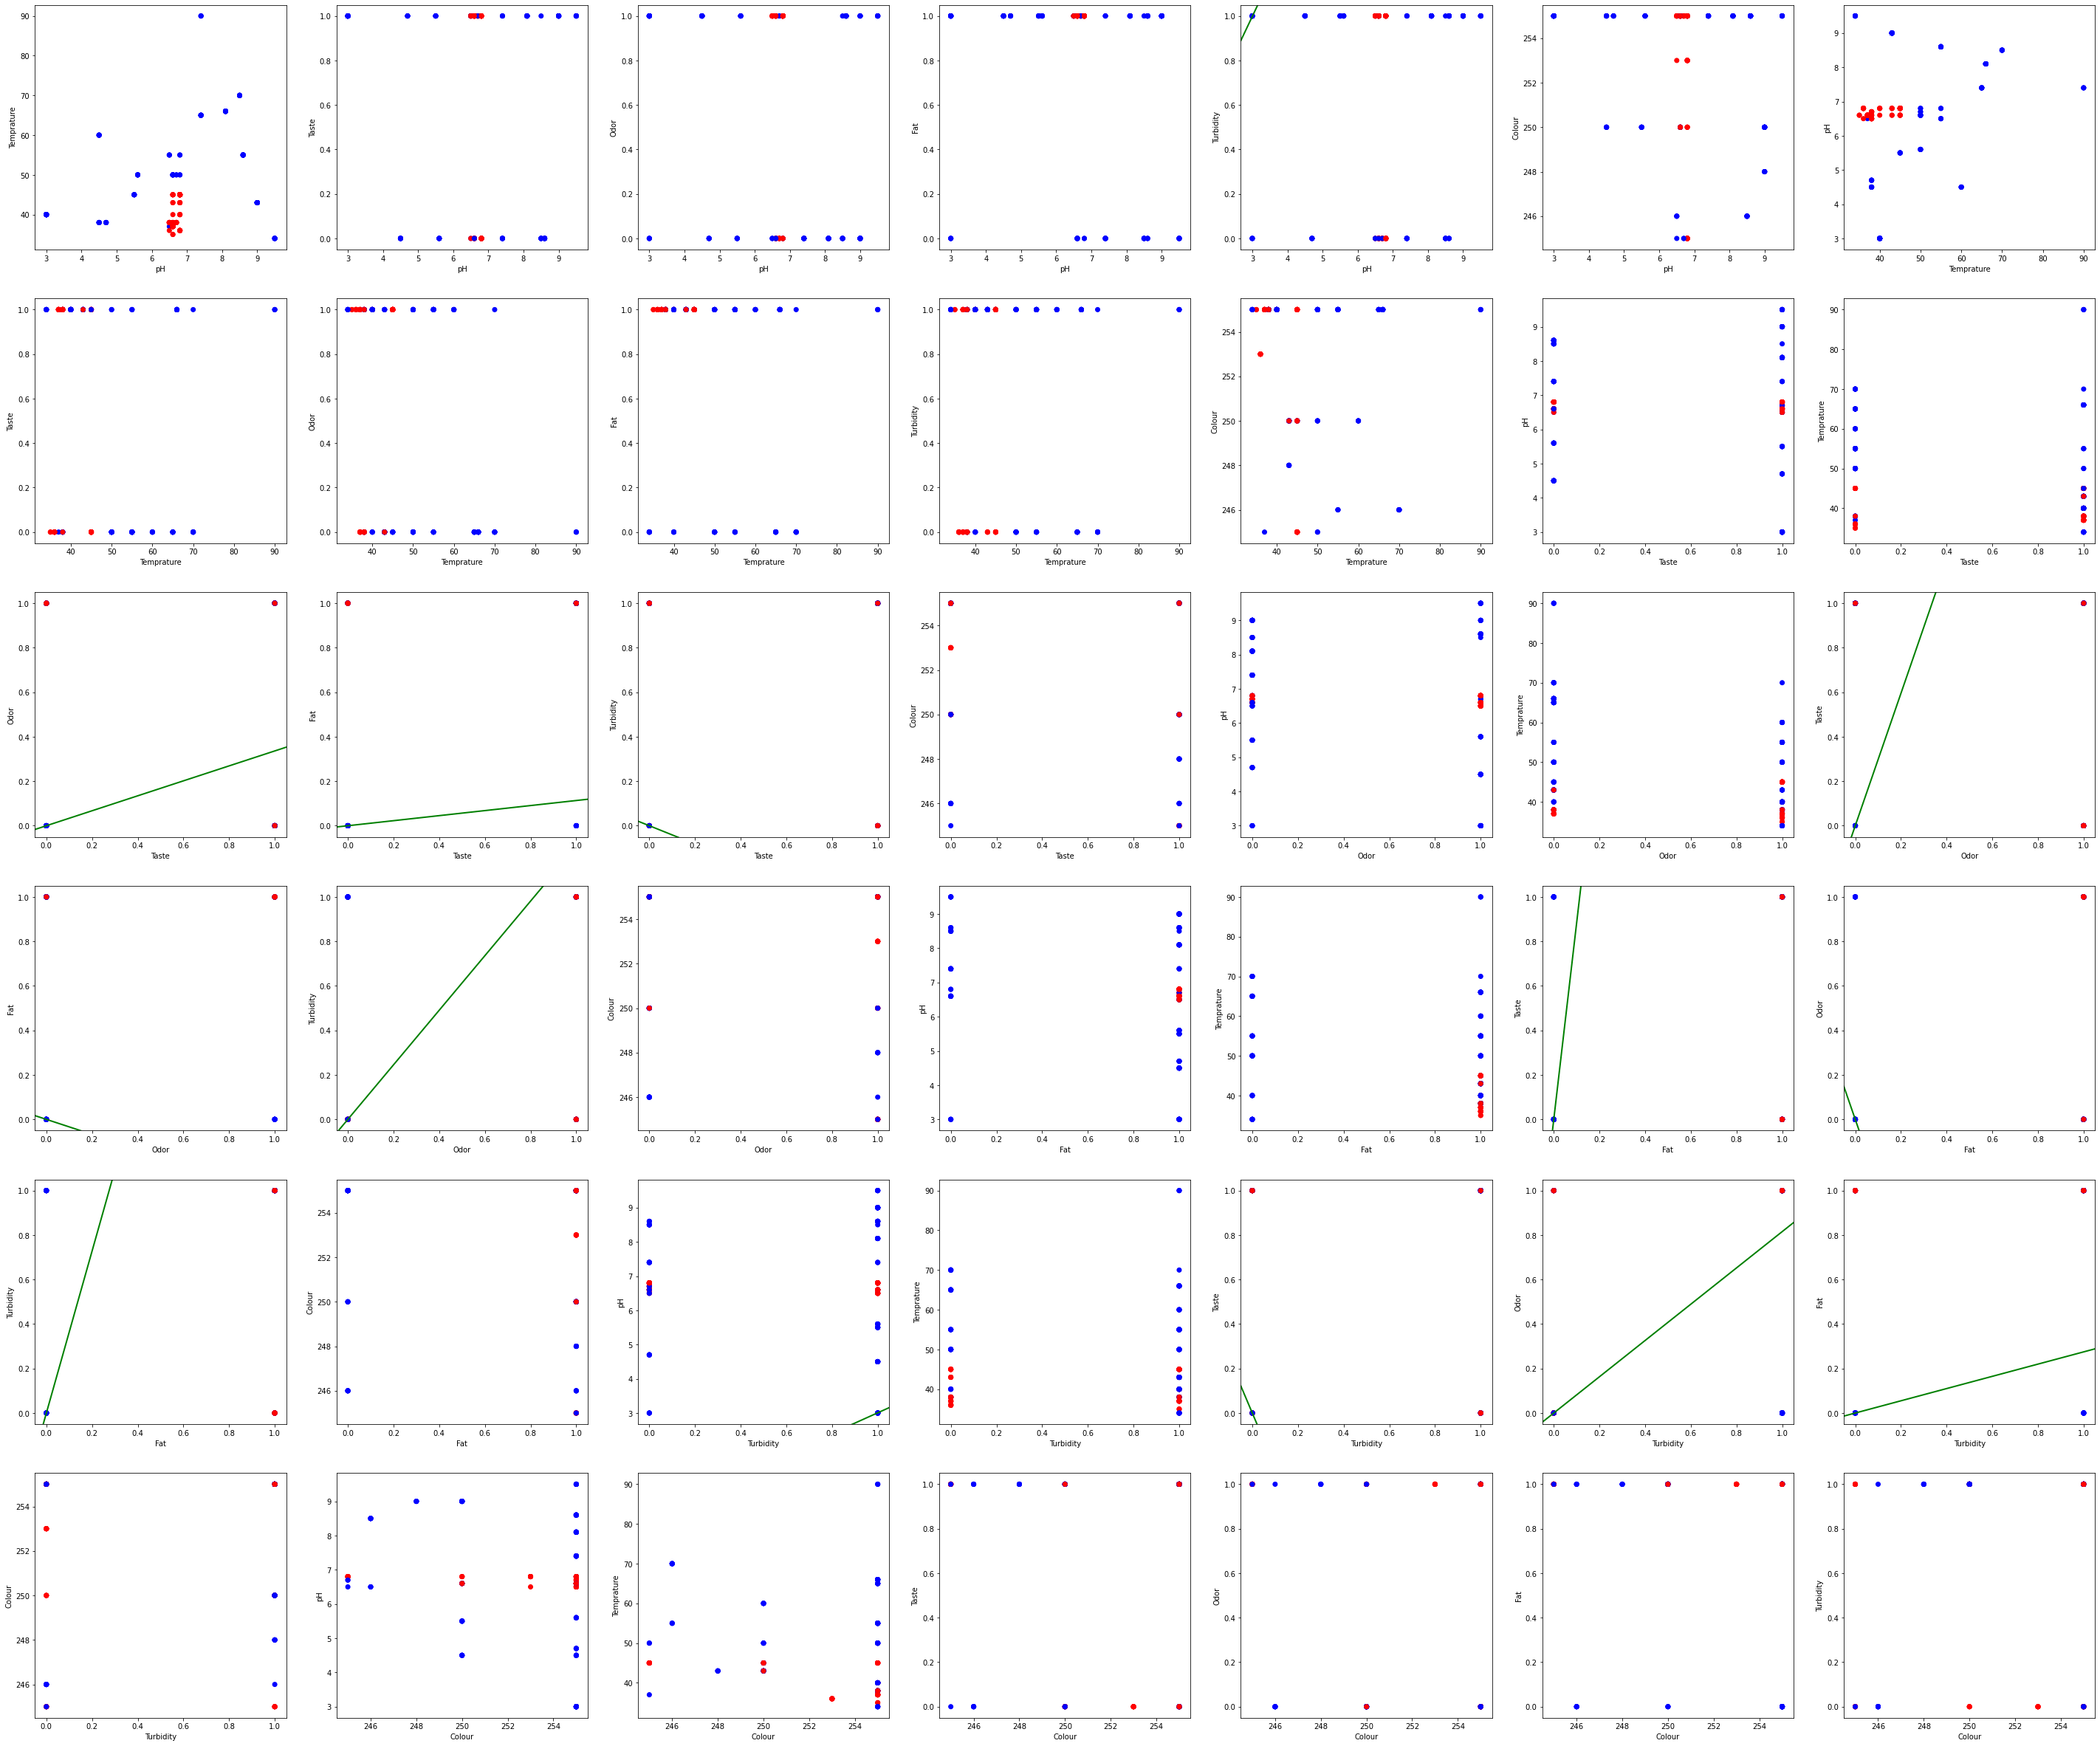

In [46]:
plot_separator_on_data(X_pre_val, y_pre_val,dataset,[],log_model, "lr")

## Support Vector Machine

In [47]:
%%time

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=42))
])

#print(svm_model.get_params())

svm_grid = [
  {'svc__C': np.logspace(3, 5, 3), 'svc__kernel': ['linear']},
  {'svc__C': np.logspace(3, 5, 3), 'svc__gamma': ['scale'], 'svc__kernel': ['rbf']},
]

svm_model, score= grid_search_with_cross_validation(svm_model, svm_grid, k_fold,  dataset, "Quality",  scoring = "f1_macro")
models["Support Vector Machine"] = {"Model": svm_model, "Score": score}

Best cross validation score: 0.9927811247070671

             Test set score: 1.0

                Best params: {'svc__C': 1000.0, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}

             Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=1000.0, random_state=42))])

Wall time: 2min 6s


In [48]:
svm_model = Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=100000.0, kernel='linear', random_state=42))])
svm_model.fit(X_pre_train, y_pre_train)
f1_measure = f1_score( y_pre_val,  svm_model.predict(X_pre_val), average="macro")
models["Support Vector Machine"] = {"Model": svm_model, "Score": f1_measure}

In [49]:
measureModel(X_pre_val, y_pre_val, svm_model.predict(X_pre_val), svm_model)

Accuracy: 0.8864628820960698

Precision good: 0.8541666666666666

Precision bad: 0.9097744360902256

Recall good: 0.8723404255319149

Recall bad: 0.8962962962962963

f1_measure: 0.8830714846818539



La f1_measure è leggermente minore di quello ottenuto con la Logistic Regression, ma comunque migliore rispetto al Perceptron.

In [50]:
svm_model.named_steps["svc"].coef_

array([[ 1.20351521, -3.72826045, -0.84522749,  1.32347872,  2.14713577,
        -1.05351193, -0.0919179 ]])

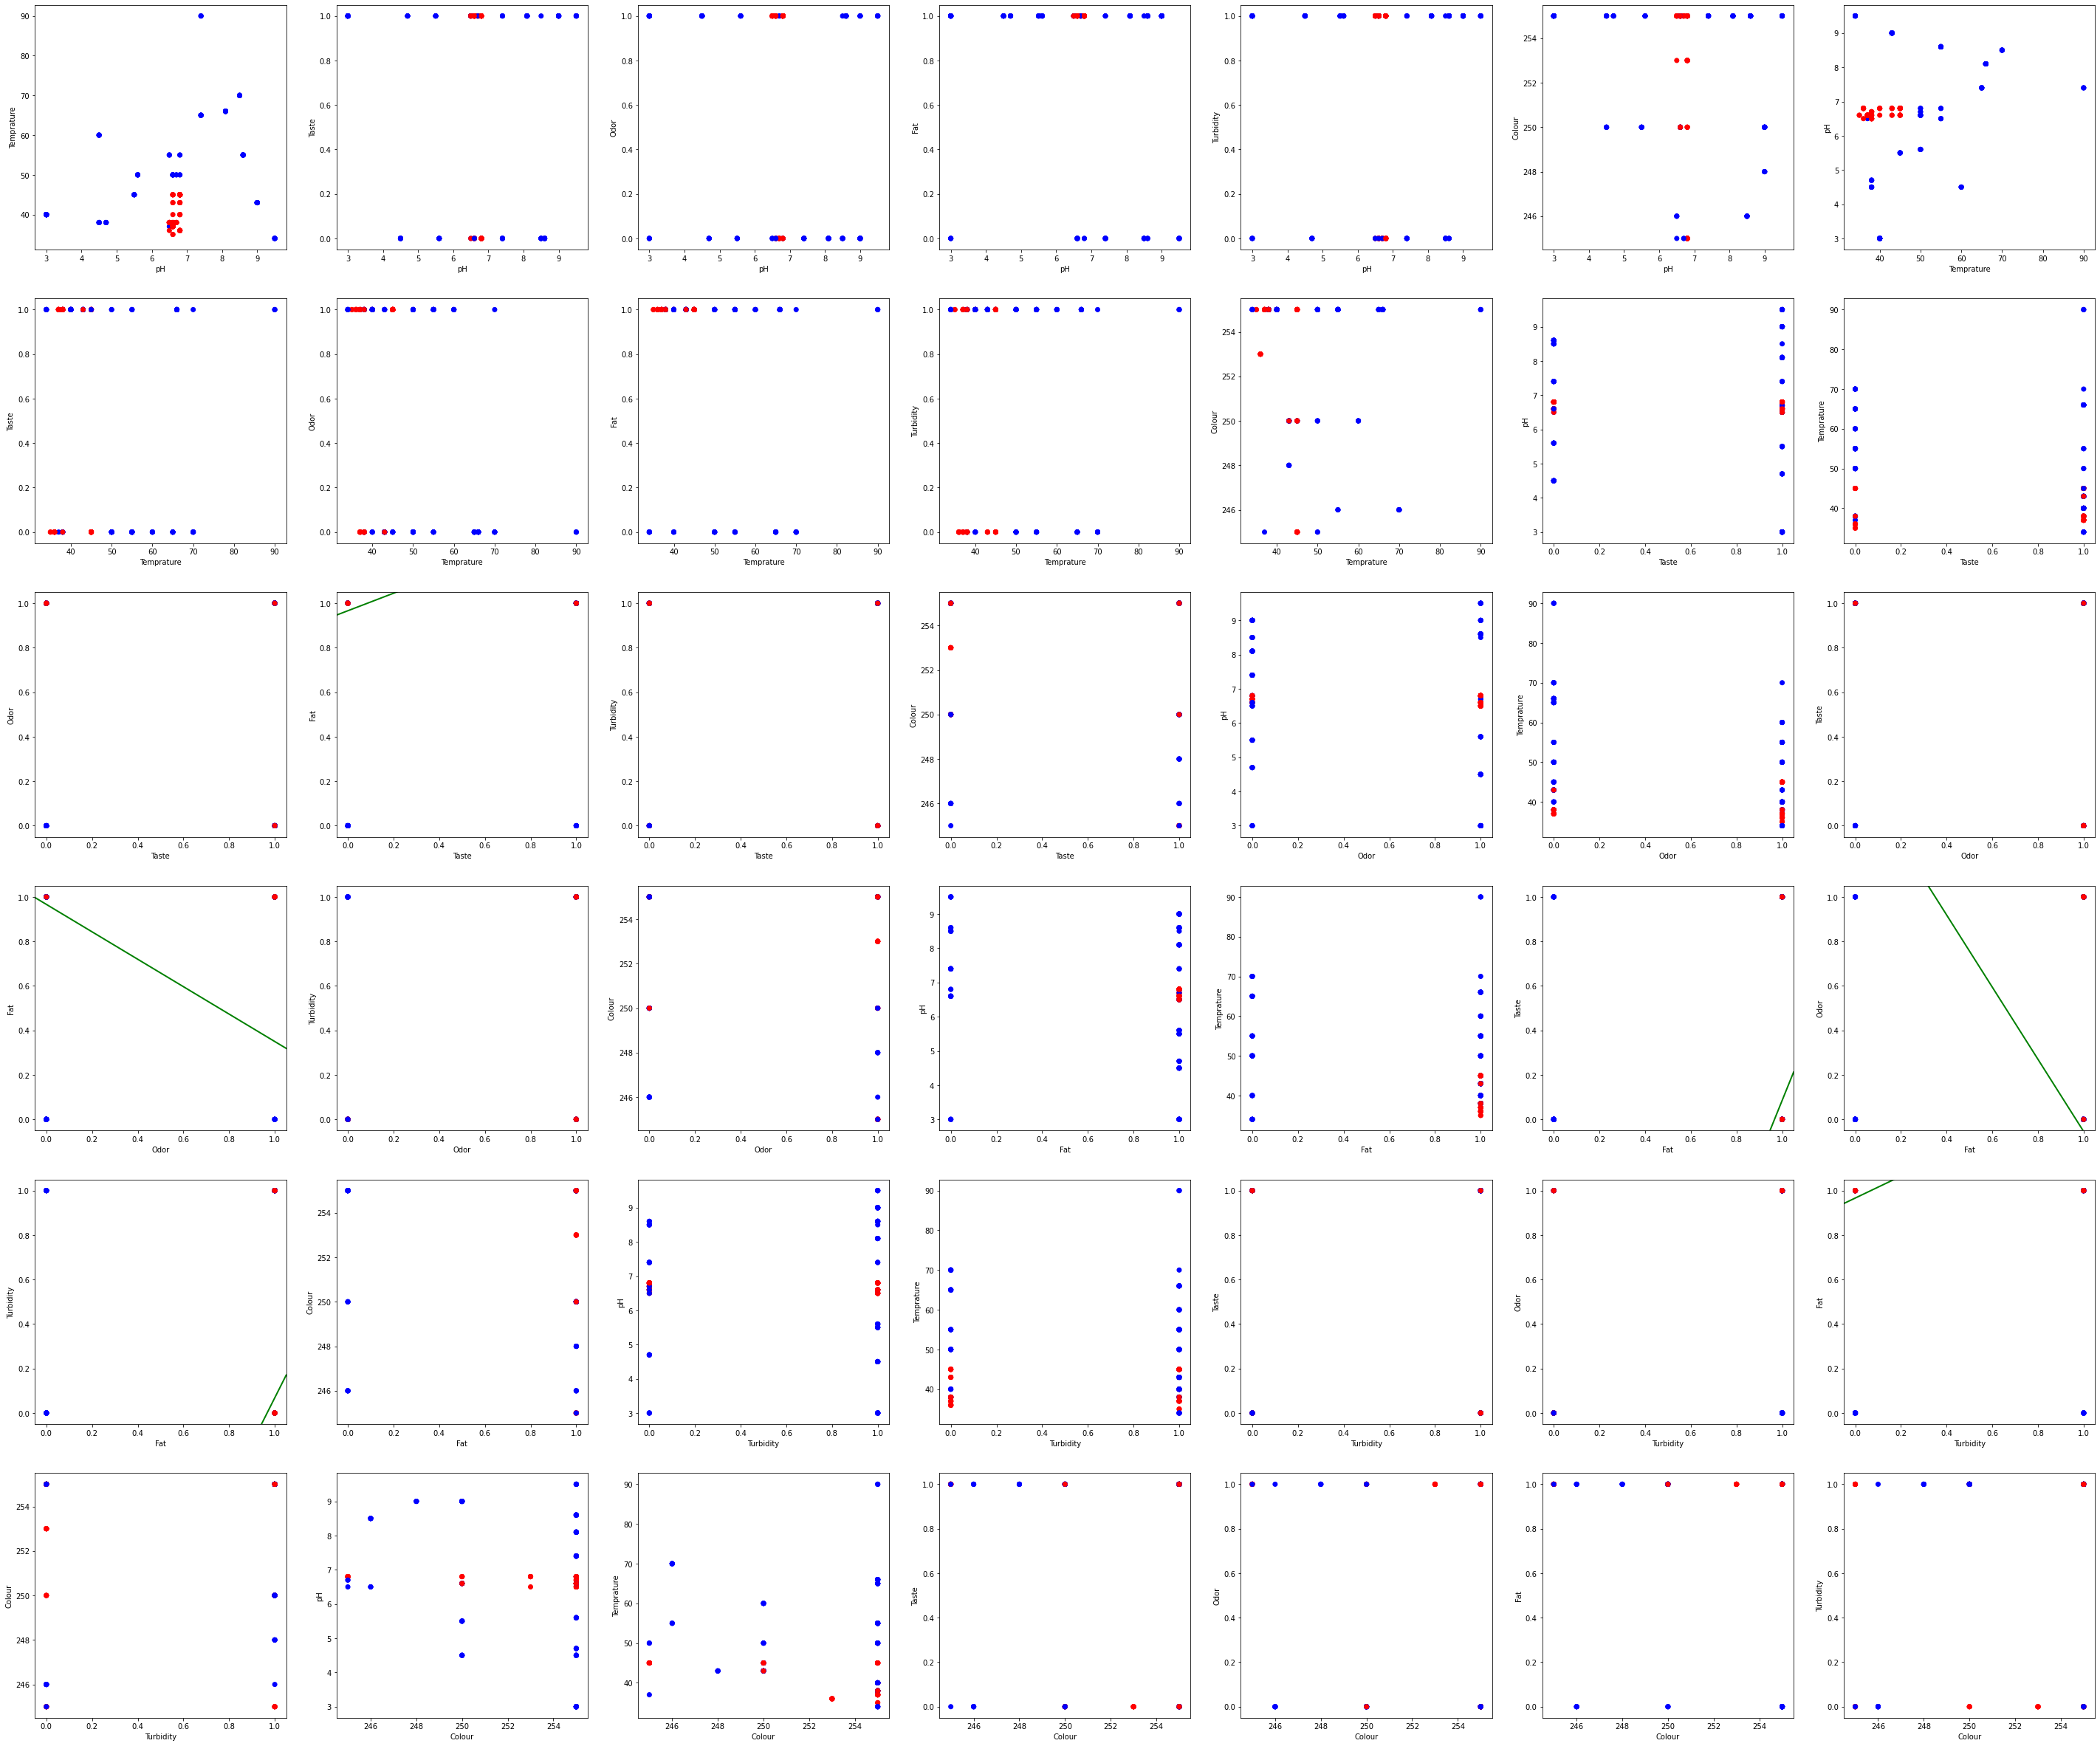

In [51]:
plot_separator_on_data(X_pre_val, y_pre_val, dataset, [], svm_model, "svc")

# Parte 4

Il seguente metodo permette di confrontare i diversi modelli con intervallo di confidenza al 95%.

In [52]:
from scipy import stats

def difference_between_two_models(error1, error2, confidence, dataset, y_val):
    z_half_alfa = stats.norm.ppf(confidence)
    variance = (((1 - error1) * error1) / len(y_val)) + (((1 - error2) * error2) / len(y_val))
    d_minus = abs(error1 - error2) - z_half_alfa * (pow(variance, 0.5))
    d_plus = abs(error1 - error2) + z_half_alfa * (pow(variance, 0.5))
    print("Valore minimo: {}\nValore massimo: {}\n".format(d_minus, d_plus))

per_error = 1 - models["Perceptron"]["Score"]
lre_error = 1 - models["Logistic Regression"]["Score"]
svm_error = 1 - models["Support Vector Machine"]["Score"]

print("Support Vector Machine vs Logistic Regression, intervallo di confidenza:")
difference_between_two_models(svm_error, lre_error, 0.95, dataset, y_pre_val)

print("Support Vector Machine vs Perceptron, intervallo di confidenza:")
difference_between_two_models(svm_error, per_error, 0.95, dataset, y_pre_val)

print("Logistic Regression vs Perceptron, intervallo di confidenza:")
difference_between_two_models( lre_error, per_error, 0.95, dataset, y_pre_val)


Support Vector Machine vs Logistic Regression, intervallo di confidenza:
Valore minimo: -0.039932151920109994
Valore massimo: 0.05724071919942806

Support Vector Machine vs Perceptron, intervallo di confidenza:
Valore minimo: 0.06767924572545425
Valore massimo: 0.18416678726747593

Logistic Regression vs Perceptron, intervallo di confidenza:
Valore minimo: 0.0770176248834803
Valore massimo: 0.19213697538876795



Si nota una somiglianza tra Logistic Regression e Perceptron, come si evidenzia anche dall'f1_measure molto simile.

In [53]:
print("F1_measure Perceptron:", models["Perceptron"]["Score"])
print("F1_measure Logistic Regression: ", models["Logistic Regression"]["Score"])
print("F1_measure Support Vector Machine: ", models["Support Vector Machine"]["Score"])


F1_measure Perceptron: 0.7571484681853888
F1_measure Logistic Regression:  0.891725768321513
F1_measure Support Vector Machine:  0.8830714846818539


Successivamente vengono generate le matrice di confusione dei diversi modelli.

In [54]:
def confusion_matrix_calculation(model):
    return confusion_matrix(y_pre_val, model.predict(X_pre_val))


Matrice di confusione del Perceptron.

In [55]:
model = Pipeline(steps=[('scaler', None),
                ('per',
                 Perceptron(alpha=0.1, fit_intercept=False,
                            n_jobs=-1, penalty='l1', random_state=42))])

model.fit(X_pre_train, y_pre_train)
conf_perc = pd.DataFrame(confusion_matrix_calculation(model))
conf_perc

,0,1
0,70,65
1,0,94


In [56]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), model)

Accuracy: 0.7161572052401747

Precision good: 0.5911949685534591

Precision bad: 1.0

Recall good: 1.0

Recall bad: 0.5185185185185185

f1_measure: 0.7130049166104309



Matrice di confusione del Logistic Regression.

In [57]:
conf_log_reg = pd.DataFrame(confusion_matrix_calculation(log_model))
conf_log_reg

,0,1
0,123,12
1,12,82


In [58]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), log_model)

Accuracy: 0.8951965065502183

Precision good: 0.5911949685534591

Precision bad: 1.0

Recall good: 1.0

Recall bad: 0.5185185185185185

f1_measure: 0.7130049166104309



Matrice di confusione Support Vector Machine.

In [59]:
conf_SVM = pd.DataFrame(confusion_matrix_calculation(svm_model))
conf_SVM

,0,1
0,121,14
1,12,82


In [60]:
measureModel(X_pre_val, y_pre_val, model.predict(X_pre_val), svm_model)

Accuracy: 0.8864628820960698

Precision good: 0.5911949685534591

Precision bad: 1.0

Recall good: 1.0

Recall bad: 0.5185185185185185

f1_measure: 0.7130049166104309



Adesso vengono calcolati gli intervalli di confidenza al 95% per ogni modello.

In [61]:
def confidence(acc, N, Z):
    den = (2*(N+Z**2))
    var = (Z*np.sqrt(Z**2+4*N*acc-4*N*acc**2)) / den
    a = (2*N*acc+Z**2) / den
    inf = a - var
    sup = a + var
    return (inf, sup)

def calculate_accuracy(conf_matrix):
    return np.diag(conf_matrix).sum() / conf_matrix.sum().sum()

In [62]:
#con confidenza del 0.95 si ha Z=1.96
pd.DataFrame([confidence(calculate_accuracy(conf_perc), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_log_reg), len(X_pre_val), 1.96),
              confidence(calculate_accuracy(conf_SVM), len(X_pre_val), 1.96)],
                 index=["perceptron", "logreg", "SVM"], columns=["inf", "sup"])

,inf,sup
perceptron,0.654569,0.770613
logreg,0.848796,0.928556
SVM,0.838841,0.921332


Dagli intervalli di confidenza al 95% abbiamo la conferma che la Logistic Regression è il modello più accurato.

Ricordiamo che, dalla misura dell'f1_measure, il modello migliore è Logistic Regression, seguito da Support Vector Machine e da Perceptron.

# PARTE 5

Si effettua uno studio sui coefficienti del modello che ha restituito il miglior risultato: logistic regression.

In [63]:
log_model = Pipeline(steps=[('scaler', None),
                ('lr',
                 LogisticRegression(penalty='l1', random_state=42,
                                    solver='liblinear'))])

log_model.fit(X_pre_train, y_pre_train)

log_model_coeff = get_coefficients(log_model, X_pre_train.columns, "lr")
log_model_coeff

pH            0.554678
Temprature   -0.266898
Taste        -0.687612
Odor          2.045359
Fat           6.067095
Turbidity    -1.667713
Colour        0.007727
dtype: float64

Risulta che tutte le variabili influenzano in maniera quasi equa la previsione della qualità del latte, anche se la feature più rilevante è la presenza di grassi.